## WBSFLIX Movies data

In [1]:
import numpy as np
import pandas as pd

In [76]:
!pip install movieposters

  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [2]:
# links.csv
url = 'https://drive.google.com/file/d/1qNLMavaKZqeoCTWRhMZkm4Z2qA6OYtoo/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
links = pd.read_csv(path)

# movies with images.csv
url = 'https://drive.google.com/file/d/10R7F3SQBpvxn_ZEOCuLTwu3h59J86Ewj/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
movies = pd.read_csv(path)

# 'ratings.csv'
url = 'https://drive.google.com/file/d/1MB3C7_ey8dn3OVMtEhcDDXoQd559CyRw/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
ratings = pd.read_csv(path)

# tags.csv
url = 'https://drive.google.com/file/d/1VrApe7hgD125pyf18pwtRR7ouiQRQlgr/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
tags = pd.read_csv(path)

In [3]:
# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 9724 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


# Making Recommendations Based on Popularity

In [4]:
ratings_pop= pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
ratings_pop.sort_values('rating', ascending=False).head()

,rating
movieId,
88448,5.0
100556,5.0
143031,5.0
143511,5.0
143559,5.0


In [5]:
ratings_pop['rating_count'] = ratings.groupby('movieId')['rating'].count()
ratings_pop.sort_values("rating_count", ascending=False).head(10)

,rating,rating_count
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
260,4.231076,251
480,3.750000,238
110,4.031646,237
589,3.970982,224


In [6]:
result= ratings_pop.merge(movies, how="inner", on="movieId")
result

,movieId,rating,rating_count,title,genres,image
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,https://m.media-amazon.com/images/M/MV5BMDU2ZW...
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,https://m.media-amazon.com/images/M/MV5BZTk2Zm...
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,https://m.media-amazon.com/images/M/MV5BMjQxM2...
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance,https://m.media-amazon.com/images/M/MV5BYzcyMD...
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy,https://m.media-amazon.com/images/M/MV5BOTEyNz...
...,...,...,...,...,...,...
9719,193581,4.000000,1,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN
9720,193583,3.500000,1,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN
9721,193585,3.500000,1,Flint (2017),Drama,NaN
9722,193587,3.500000,1,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN


In [7]:
top_10=result.sort_values("rating_count", ascending=False).head(10)
top_10=top_10[['movieId','title','genres','rating','rating_count']]
top_10

,movieId,title,genres,rating,rating_count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238
97,110,Braveheart (1995),Action|Drama|War,4.031646,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224
461,527,Schindler's List (1993),Drama|War,4.225000,220


In [8]:
import pickle
pickle.dump(top_10, open(file='Popular_movies.sav', mode='wb'))

# Making Recommendations Items Based on Correlation

In [9]:
movies_crosstab = pd.pivot_table(data=ratings, values='rating', index='userId', columns='movieId')
movies_crosstab.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
top_popular_movieID = 356

In [11]:
Forest_gump_ratings = movies_crosstab[top_popular_movieID]
Forest_gump_ratings[Forest_gump_ratings>=0]

userId
1      4.0
6      5.0
7      5.0
8      3.0
10     3.5
      ... 
605    3.0
606    4.0
608    3.0
609    4.0
610    3.0
Name: 356, Length: 329, dtype: float64

In [12]:
#Evaluating
similar_to_Forest_gump = movies_crosstab.corrwith(Forest_gump_ratings)
similar_to_Forest_gump

C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movieId
1         0.303465
2         0.367247
3         0.534682
4         0.388514
5         0.349541
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Length: 9724, dtype: float64

In [13]:
corr_Forest_gump = pd.DataFrame(similar_to_Forest_gump, columns=['PearsonR'])
corr_Forest_gump.dropna(inplace=True)
corr_Forest_gump.head(3)

,PearsonR
movieId,
1,0.303465
2,0.367247
3,0.534682


In [14]:
rating = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
rating['rating_count'] = ratings.groupby('movieId')['rating'].count()
rating

,rating,rating_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [15]:
Forest_gump_corr_summary = corr_Forest_gump.join(rating['rating_count'])
Forest_gump_corr_summary.drop(top_popular_movieID, inplace=True) # drop Tortas Locas itself
Forest_gump_corr_summary

,PearsonR,rating_count
movieId,,
1,0.303465,215
2,0.367247,110
3,0.534682,52
4,0.388514,7
5,0.349541,49
...,...,...
185585,-1.000000,2
187541,1.000000,4
187593,-0.203519,12


In [16]:
top10 = Forest_gump_corr_summary[Forest_gump_corr_summary['rating_count']>=10].sort_values('PearsonR', ascending=False).head(10)
top10

,PearsonR,rating_count
movieId,,
1295,0.932958,11
6793,0.885253,11
328,0.881682,10
4954,0.865633,11
911,0.850591,13
55721,0.799415,10
195,0.786428,10
181,0.785661,17
80906,0.782601,12


In [17]:
top10 = top10.merge(movies, left_index=True, right_on="movieId")
top10

,PearsonR,rating_count,movieId,title,genres,image
993,0.932958,11,1295,"Unbearable Lightness of Being, The (1988)",Drama,https://m.media-amazon.com/images/M/MV5BYTViNz...
4573,0.885253,11,6793,Beethoven (1992),Children|Comedy|Drama,NaN
286,0.881682,10,328,Tales from the Crypt Presents: Demon Knight (1...,Horror|Thriller,https://m.media-amazon.com/images/M/MV5BOTc0OD...
3607,0.865633,11,4954,Ocean's Eleven (a.k.a. Ocean's 11) (1960),Comedy|Crime,NaN
693,0.850591,13,911,Charade (1963),Comedy|Crime|Mystery|Romance|Thriller,https://m.media-amazon.com/images/M/MV5BZjkyZm...
6607,0.799415,10,55721,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller,NaN
165,0.786428,10,195,Something to Talk About (1995),Comedy|Drama|Romance,https://m.media-amazon.com/images/M/MV5BODliOW...
153,0.785661,17,181,Mighty Morphin Power Rangers: The Movie (1995),Action|Children,https://m.media-amazon.com/images/M/MV5BYzU2Zj...
7436,0.782601,12,80906,Inside Job (2010),Documentary,NaN
9193,0.776636,10,150548,Sherlock: The Abominable Bride (2016),Action|Crime|Drama|Mystery|Thriller,NaN


In [69]:
# your code here
def top_n_movie(movie_id,n):
    movie_ratings = movies_crosstab[movie_id]
    similar_to_movie = movies_crosstab.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['PearsonR'])
    corr_movie.dropna(inplace=True)
    movie_corr_summary = corr_movie.join(rating['rating_count'])
    movie_corr_summary.drop(movie_id, inplace=True) # drop the inputed restaurant itself
    top10 = movie_corr_summary[movie_corr_summary['rating_count']>=10].sort_values('PearsonR', ascending=False).head(5)
    top10 = top10.merge(movies, left_index=True, right_on="movieId")
    return top10

In [74]:
result=top_n_movie(48,5)

C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [75]:
result

,PearsonR,rating_count,movieId,title,genres,image
8929,1.0,17,136020,Spectre (2015),Action|Adventure|Crime,NaN
9430,1.0,10,166461,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy,NaN
1451,1.0,16,1974,Friday the 13th (1980),Horror|Mystery|Thriller,https://m.media-amazon.com/images/M/MV5BN2EwND...
626,1.0,12,798,Daylight (1996),Action|Adventure|Drama|Thriller,https://m.media-amazon.com/images/M/MV5BNThjNW...
5261,1.0,15,8638,Before Sunset (2004),Drama|Romance,NaN


In [20]:
import pickle
pickle.dump(result, open(file='Item_movies.sav', mode='wb'))

# Making Recommendations Users Based on Correlation

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
def top_user_movie(id,n):
  users_items = pd.pivot_table(data=ratings,  values='rating', index='userId', columns='movieId')
  users_items.fillna(0, inplace=True)
  user_id=id
  user_similarities = pd.DataFrame(cosine_similarity(users_items),columns=users_items.index, index=users_items.index)
  weights =(user_similarities.query("userId!=@user_id")[user_id] / sum(user_similarities.query("userId!=@user_id")[user_id]) )
  not_visited_restaurants = users_items.loc[users_items.index!=user_id, users_items.loc[user_id,:]==0]
  weighted_averages = pd.DataFrame(not_visited_restaurants.T.dot(weights), columns=["predicted_rating"])
  recommendations = weighted_averages.merge(movies, left_index=True, right_on="movieId")
  result=recommendations.sort_values("predicted_rating", ascending=False).head(n)
  return result['title']

In [24]:
top_user_movie(1,5)

277                      Shawshank Redemption, The (1994)
507                     Terminator 2: Judgment Day (1991)
659                                 Godfather, The (1972)
2078                              Sixth Sense, The (1999)
3638    Lord of the Rings: The Fellowship of the Ring,...
Name: title, dtype: object

In [25]:
def movie_user():
    user_id =int(input())
    result = top_n_rest(user_id, 5)
    print(f"Recommened Movies: {list(result['title'])[0:5]}")

result= movie_user()

 1


C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prach\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Recommened Movies: ['Trainwreck (2015)', 'The Nice Guys (2016)', 'Battleship Potemkin (1925)', 'Avengers: Infinity War - Part I (2018)', 'Predestination (2014)']


In [28]:
users_items = pd.pivot_table(data=ratings, values='rating', index='userId', columns='movieId')
users_items.fillna(0, inplace=True)

user_similarities = pd.DataFrame(cosine_similarity(users_items),
                                 columns=users_items.index, 
                                 index=users_items.index)
user_similarities.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [30]:
pickle.dump(user_similarities,open(file='User_movie.sav', mode='wb'))

# WBSFLIX EVALUATION

In [31]:
import numpy as np
np.nonzero(np.array(users_items))

(array([  0,   0,   0, ..., 609, 609, 609], dtype=int64),
 array([   0,    2,    5, ..., 9444, 9445, 9485], dtype=int64))

In [32]:
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(users_items)), # find out all the positions different than 0
).T
ratings_pos.head()

,0,1
0,0,0
1,0,2
2,0,5
3,0,43
4,0,46


In [33]:
users_items.iloc[0:1, [0, 2, 5, 43, 46]]

movieId,1,3,6,47,50
userId,,,,,
1,4.0,4.0,4.0,5.0,5.0


In [34]:
len(ratings_pos)

100836

In [35]:
# 2nd step to create train and test
# split with train and test
from sklearn.model_selection import train_test_split
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)

In [36]:
train_pos.sort_values([0,1]).head(3)

,0,1
0,0,0
1,0,2
3,0,43


In [37]:
test_pos.sort_values([0,1]).head(3)

,0,1
2,0,5
43,0,632
54,0,787


In [38]:
pd.DataFrame(np.zeros(users_items.shape))

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# create an empty arrays full of 0, with the same shape as the users-items data
train = np.zeros(users_items.shape)

# fill the set with the ratings based on the train positions
for pos in train_pos.values: 
    index = pos[0]
    col = pos[1]
    train[index, col] = users_items.iloc[index, col]

# convert arrays to dataframe
train = pd.DataFrame(train, 
                     columns=users_items.columns, 
                     index=users_items.index)

train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
train.iloc[0:1, [0, 2, 5, 43, 46]]

movieId,1,3,6,47,50
userId,,,,,
1,4.0,4.0,0.0,5.0,5.0


In [42]:
test = np.zeros(users_items.shape)

for pos in test_pos.values: 
    index = pos[0]
    col = pos[1]
    test[index, col] = users_items.iloc[index, col]
    
test = pd.DataFrame(test, 
                    columns=users_items.columns, 
                    index=users_items.index)

In [43]:
test.iloc[0:1, [0, 2, 5, 43, 46]]

movieId,1,3,6,47,50
userId,,,,,
1,0.0,0.0,4.0,0.0,0.0


In [44]:
true_test_ratings = []

for row in test_pos.iterrows():
    true_test_ratings.append(users_items.iloc[int(row[1][0]), int(row[1][1])])

In [45]:
test_pos = test_pos.assign(true_rating = true_test_ratings)

In [46]:
test_pos.head()

,0,1,true_rating
16705,104,7306,5.0
3692,21,3012,4.5
74367,473,3578,3.0
49894,318,8945,4.5
84800,549,8532,4.5


In [47]:
# 3rd step to build the similarity matrix for the train set
# train the model
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.015234,0.067484,0.171337,0.128902,0.121473,0.131189,0.148958,0.072979,0.010804,...,0.079137,0.157330,0.198989,0.066681,0.159430,0.140858,0.235214,0.276807,0.101351,0.116009
2,0.015234,1.000000,0.000000,0.004214,0.018637,0.016235,0.011991,0.030243,0.000000,0.050912,...,0.207869,0.000000,0.013404,0.000000,0.000000,0.023669,0.014767,0.035786,0.030461,0.094330
3,0.067484,0.000000,1.000000,0.002577,0.005698,0.004467,0.000000,0.005548,0.000000,0.000000,...,0.005641,0.005635,0.027755,0.000000,0.012096,0.014869,0.022211,0.023929,0.000000,0.028087


In [48]:
# 4th step to Predict rating for a single place of the test set
results = (
    pd.DataFrame({
        'ratings': train.loc[:,318], 
        'similarities' : train_similarity.loc[1,:].tolist()
    })
)
results.head()

,ratings,similarities
userId,,
1,0.0,1.000000
2,3.0,0.015234
3,0.0,0.067484
4,0.0,0.171337
5,3.0,0.128902


In [49]:
results = results.assign(weights = results.similarities / (sum(results.similarities)-1))

In [50]:
results.head()

,ratings,similarities,weights
userId,,,
1,0.0,1.000000,0.013476
2,3.0,0.015234,0.000205
3,0.0,0.067484,0.000909
4,0.0,0.171337,0.002309
5,3.0,0.128902,0.001737


In [51]:
results = results.assign(weighted_ratings = results.ratings * results.weights)
results.head(3)

,ratings,similarities,weights,weighted_ratings
userId,,,,
1,0.0,1.000000,0.013476,0.000000
2,3.0,0.015234,0.000205,0.000616
3,0.0,0.067484,0.000909,0.000000


In [52]:
results = results.assign(weighted_ratings = results.ratings * results.weights)
results.head(3)

,ratings,similarities,weights,weighted_ratings
userId,,,,
1,0.0,1.000000,0.013476,0.000000
2,3.0,0.015234,0.000205,0.000616
3,0.0,0.067484,0.000909,0.000000


In [55]:
pred_rating = results.weighted_ratings.sum()
pred_rating

2.430480953142492

In [53]:
true_rating = users_items.loc[1, 318]
true_rating

0.0

In [56]:
error = true_rating - pred_rating
error

-2.430480953142492

In [57]:
def recommender(index_pos, column_pos): 
    # build a df with the ratings for one place (column_name) and
    # the similarities to one user (index_name)
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:].tolist()
      })
    )
    
    # compute the weights
    results = results.assign(weights = results.similarities / (sum(results.similarities) -1))
    
    # compute the weighted ratings
    results = results.assign(weighted_ratings = results.ratings * results.weights)
    
    # return rating prediction for one user and one movie
    return results.weighted_ratings.sum()

In [58]:
recommender(2, 85)

0.009342138063007986

In [59]:
test_pos.sort_values([0, 1])

,0,1,true_rating
2,0,5,4.0
43,0,632,4.0
54,0,787,3.0
62,0,827,5.0
68,0,897,5.0
...,...,...,...
100755,609,8817,3.0
100767,609,8899,3.5
100774,609,8945,3.5
100787,609,9016,4.0


In [62]:
recs_test = []

for row in test_pos.iterrows():
    recs_test.append(
        recommender(
            index_pos = int(row[1][0]), 
            column_pos = int(row[1][1])
        )
    )

In [63]:
len(recs_test)

10084

In [64]:
test_pos = test_pos.assign(pred_rating = recs_test)

In [65]:
test_pos.head()

,0,1,true_rating,pred_rating
16705,104,7306,5.0,0.137385
3692,21,3012,4.5,0.672706
74367,473,3578,3.0,0.038431
49894,318,8945,4.5,0.064935
84800,549,8532,4.5,0.351212


In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

3.00644891379616

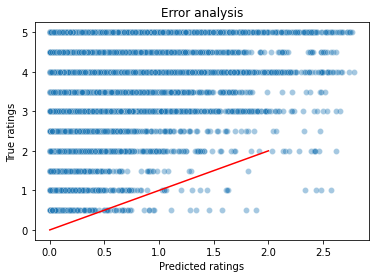

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = test_pos.pred_rating
true_values = test_pos.true_rating

plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')
sns.lineplot(x=[0,2], y=[0,2], color='red')
sns.scatterplot(x=predictions, y=true_values, alpha=0.4)
plt.show()

In [68]:
from sklearn.metrics import r2_score

r2_score(test_pos.true_rating, test_pos.pred_rating)

-8.263389365140958